<a href="https://colab.research.google.com/github/prajwalg26/Movie-Sales-Analysis-IMDB/blob/main/TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Investigate a TMDB Movies Dataset**


**Introduction**
TMDb dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.This dataset has 21 columns and 10866 rows. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.

1. **Revenue Analysis**

   * Movie with the highest revenue of all time
   * Movie with the lowest revenue of all time
   * Top 10 movies in terms of revenue
   * Bottom 10 movies in terms of revenue

2. **Budget Analysis**

   * Movie with the highest budget of all time
   * Movie with the lowest budget of all time
   * Top 10 movies in terms of budget
   * Bottom 10 movies in terms of budget

3. **Profit Analysis**

   * Highest profit movie of all time *(Profit = Revenue – Budget)*
   * Lowest profit movie of all time *(Profit = Revenue – Budget)*
   * Top 10 movies in terms of profit
   * Bottom 10 movies in terms of profit

4. **Runtime Analysis**

   * Movie with the shortest runtime
   * Movie with the longest runtime
   * Top 10 shortest movies by runtime
   * Top 10 longest movies by runtime
   * Average runtime of movies from year to year

5. **Budget Trend Over Time**

   * Total budget of movies from year to year

6. **Release Month Analysis**

   * Month with the maximum number of releases
   * Number of movies released in each month
   * Total profit by month
   * Month with the highest total profit

7. **Genre Analysis**

   * Most popular genres from year to year
   * Genre with the highest number of movie releases

8. **Cast & Crew Analysis**

   * Most frequent star cast members (Top 20 actors/actresses by appearances)
   * Top 20 directors who have directed the maximum number of movies

9. **High Revenue Movie Attributes**

   * Properties associated with high-revenue movies (e.g., budget range, genres, release months)

10. **Title Length & Popularity**

    * Relation between the length of a movie title and its popularity





In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


**Loading the Dataset**

In [ ]:
df = pd.read_csv('/content/tmdb-movies.csv')

In [ ]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**Data Wrangling**

General Properties

In [ ]:
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Find number of Nan values in every columns

In [ ]:
df.isna().sum()

,0
id,0
imdb_id,10
popularity,0
budget,0
revenue,0
original_title,0
cast,76
homepage,7930
director,44
tagline,2824


By calling describe function we can see that we have a zero values in budget, revenue and runtime columns

Which means that the values of those variables has not been recorded and are missing values

Movies of this dataset are released between 1960 and 2015

In [ ]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Data Cleaning**

I have to :



*   Drop unused columns in our analysis from the DataFrame
*   Drop the duplicated rows.

*   Remove the movies which have zero budget and revenue.
*   Zero value in budget and revenue and runtime columns means that the values of those variables has not been recorded
*   I replace the values from ‘0’ to ‘NAN’, then drop the rows which have missing values.
*   Change the format of release date into Datetime format
Check whether all columns are in the desired data type. Otherwise I have to convert their datatype

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Before any data cleaning, it's better to make a copy of dataframe and
#First of all, I would like to drop columns that I will not use in my analysis
df_clean = df.copy()

df_clean = df_clean.drop(['imdb_id','homepage','tagline','keywords','overview'], axis=1)
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [ ]:
#now I remove duplicate rows
#the result tell us that we had only one duplicated row
df_clean.drop_duplicates(inplace =True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  float64
 15  revenue_adj           10

In [ ]:
df_clean[['budget', 'revenue', 'runtime']] =df_clean[['budget', 'revenue', 'runtime']].replace(0,np.nan)

In [ ]:
print(df_clean.isna().sum())


id                         0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [ ]:
df_clean.dropna(subset=['budget', 'revenue', 'runtime', 'cast', 'director'], inplace=True)
#df_clean.dropna(subset=['budget', 'revenue', 'runtime'], inplace=True)
print('After cleaning, we have {} rows'.format(df_clean.shape[0]))
print(df_clean.isna().sum())

After cleaning, we have 3849 rows
id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
director                 0
runtime                  0
genres                   0
production_companies    44
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64


In [ ]:
#Now we change the format of release date into Datetime format
df_clean['release_date']= pd.to_datetime(df_clean['release_date'], format="%m/%d/%y")
df_clean['release_date'].head()

,release_date
0,2015-06-09
1,2015-05-13
2,2015-03-18
3,2015-12-15
4,2015-04-01


In [ ]:
#now we check the datatype of each column
df_clean.dtypes

,0
id,int64
popularity,float64
budget,float64
revenue,float64
original_title,object
cast,object
director,object
runtime,float64
genres,object
production_companies,object


In [ ]:
#add a profit column by subtract budget from revenue
# I use revenue_adj and budget_adj column to take inflation into account
df_clean['profit']=df_clean['revenue_adj']-df_clean['budget_adj']
df_clean.describe()

,id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3.849000e+03
mean,39885.146791,1.192933,3.724886e+07,1.078148e+08,109.217459,2003-07-17 06:39:56.258768384,528.387114,6.168693,2001.258249,4.429360e+07,1.372313e+08,9.293772e+07
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,1969-05-25 00:00:00,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,6072.000000,0.463337,1.000000e+07,1.367069e+07,95.000000,1996-09-20 00:00:00,71.000000,5.700000,1995.000000,1.316623e+07,1.843023e+07,-1.503317e+06
50%,11313.000000,0.798582,2.400000e+07,4.490726e+07,106.000000,2005-02-04 00:00:00,205.000000,6.200000,2004.000000,3.005030e+07,6.181393e+07,2.745198e+07
75%,38575.000000,1.374300,5.000000e+07,1.243052e+08,119.000000,2010-10-21 00:00:00,581.000000,6.700000,2010.000000,6.076720e+07,1.634115e+08,1.075480e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,2068-12-04 00:00:00,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09
std,67248.890597,1.475622,4.221699e+07,1.766175e+08,19.914141,NaN,880.333629,0.794697,11.285642,4.481360e+07,2.162018e+08,1.941716e+08


**Exploratory Data Analysis**

Since we want to find top 10 and bottom 10 values in some columns, it is good to define function that do this job for us and call the function for different columns.

In [ ]:
def find_top_n(df, column, n =10):
    #sort_values function Returns a sorted Data Frame with Same dimensions
    sorted_df = df.sort_values(column, axis = 0, ascending = False)[:n]

    #now we should return name of those movies which are on top 10 of specific column
    return sorted_df[['original_title', column]]

In [ ]:
def find_bottom_n(df, column, n =10):
    sorted_df = df.sort_values(column, axis = 0, ascending = True)[:n]

    #return name of those movies which are on bottom 10 of specific column
    return sorted_df[['original_title', column]]

Question 1

Which movies have the highest and lowest revenue?

Text(0.5, 0, 'Revenue (US Dollars)')

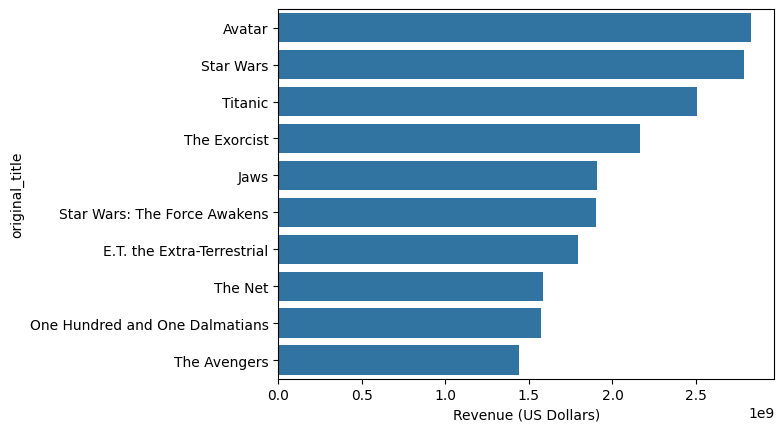

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#find_top_n(df_clean, 'revenue').plot(x="original_title", y="revenue", title='Revenue (US Dollars)' , kind="barh")
sns.barplot(x='revenue_adj', y='original_title', data=find_top_n(df_clean, 'revenue_adj'))
plt.xlabel("Revenue (US Dollars)")

Text(0.5, 0, 'Revenue (US Dollars)')

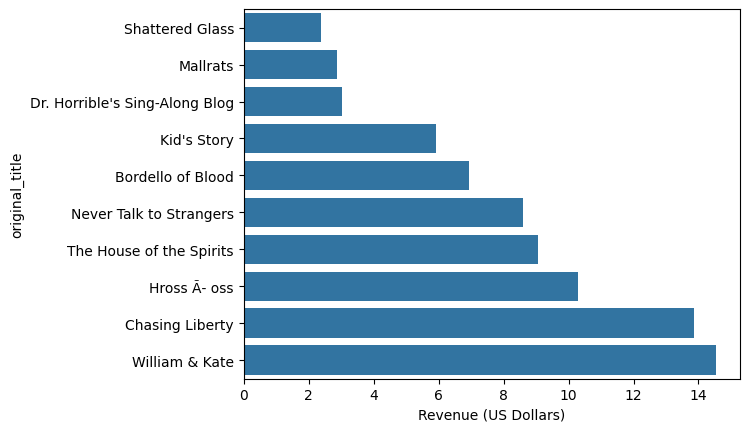

In [ ]:
sns.barplot(x='revenue_adj', y='original_title', data=find_bottom_n(df_clean, 'revenue_adj'))
plt.xlabel("Revenue (US Dollars)")
#find_bottom_n(df_clean, 'revenue', 2)

From the two bar chart we can see that Avatar moive directed, written and produced by James Cameron has highest revenue(2.5 billion dollars). Shattered Glass has the lowest revenue.

Question 2

Which movies have the highest and lowest Budget?

Text(0.5, 0, 'Budget (US Dollars)')

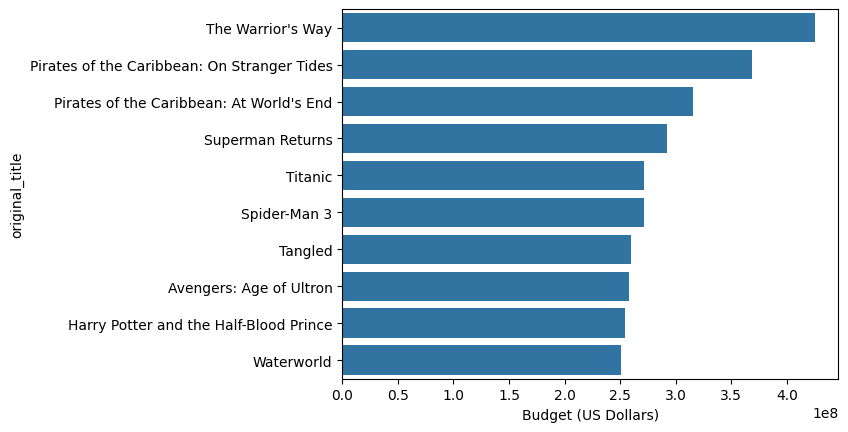

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
sns.barplot(x='budget_adj', y='original_title', data=find_top_n(df_clean, 'budget_adj'))
plt.xlabel("Budget (US Dollars)")

Text(0.5, 0, 'Budget (US Dollars)')

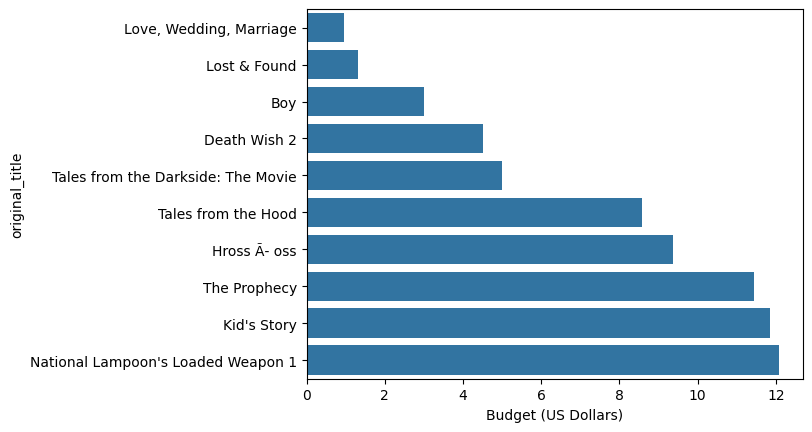

In [ ]:
sns.barplot(x='budget_adj', y='original_title', data=find_bottom_n(df_clean, 'budget_adj'))
plt.xlabel("Budget (US Dollars)")

From the two bar chart, we can see that The Warrior's Way has the highest budget($42 million). Love, Wedding, Marriage has the lowest budget.

Question 3

What are the most and the least profitable movies of all time? top and bottom 10 in terms of profit?

Text(0.5, 0, 'Profit (US Dollars)')

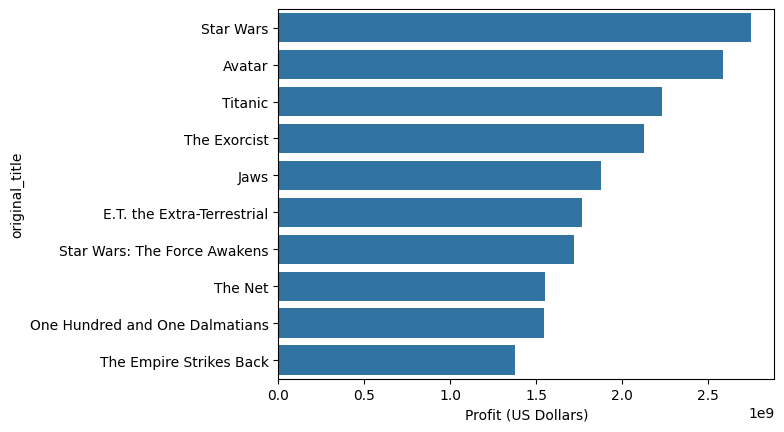

In [ ]:
sns.barplot(x='profit', y='original_title', data=find_top_n(df_clean, 'profit'))
plt.xlabel("Profit (US Dollars)")
#df[df.original_title == 'Star Wars']

Text(0.5, 0, 'Profit (US Dollars)')

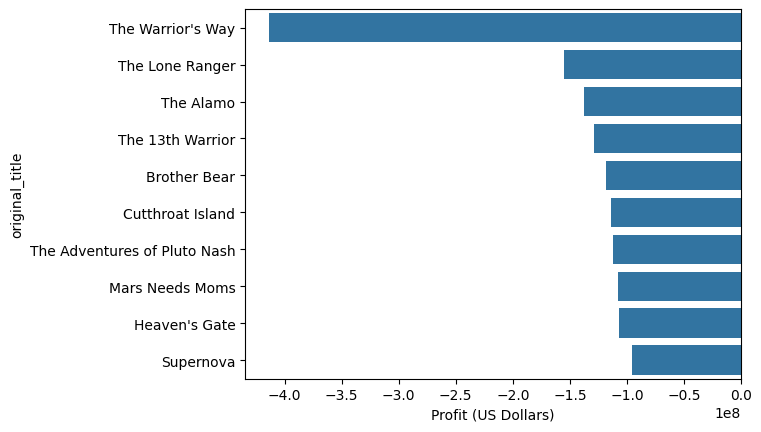

In [ ]:
sns.barplot(x='profit', y='original_title', data=find_bottom_n(df_clean, 'profit'))
plt.xlabel("Profit (US Dollars)")

We can see from bar chart that Star Wars earned the most profit. The Warrior's Way movie was a least profitable movie.It was a total box office failure and its costs exceed the revenue.

Question 4

Movie with shorest and longest runtime? top and bottom 10 in terms of runtime?

Text(0.5, 0, 'Runtime (Minutes)')

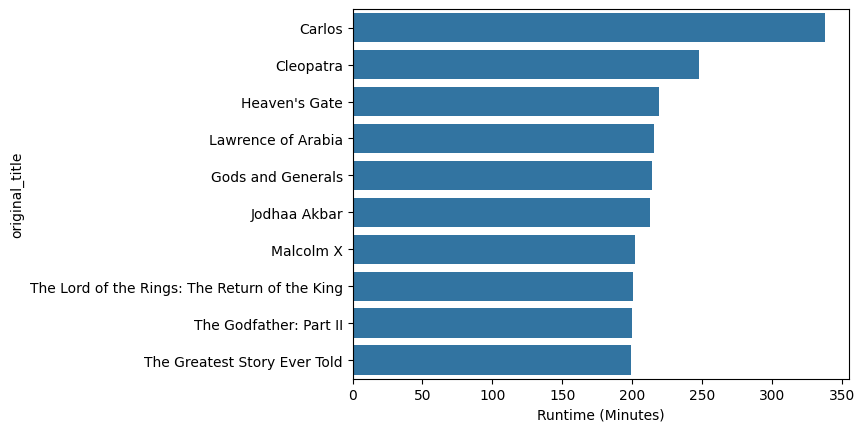

In [ ]:
sns.barplot(x='runtime', y='original_title', data=find_top_n(df_clean, 'runtime'))
plt.xlabel("Runtime (Minutes)")

Text(0.5, 0, 'Runtime (Minutes)')

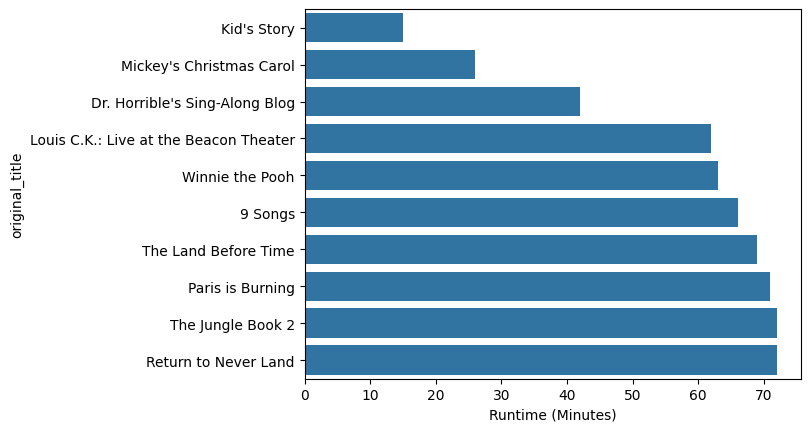

In [ ]:
sns.barplot(x='runtime', y='original_title', data=find_bottom_n(df_clean, 'runtime'))
plt.xlabel("Runtime (Minutes)")



*   Movie with shorest runtime: Kid's Story(2003) (15min)
*  Movie with longest runtime: Carlos(2010) (338 min)



Question 5

Average Runtime Of Movies From Year To Year?

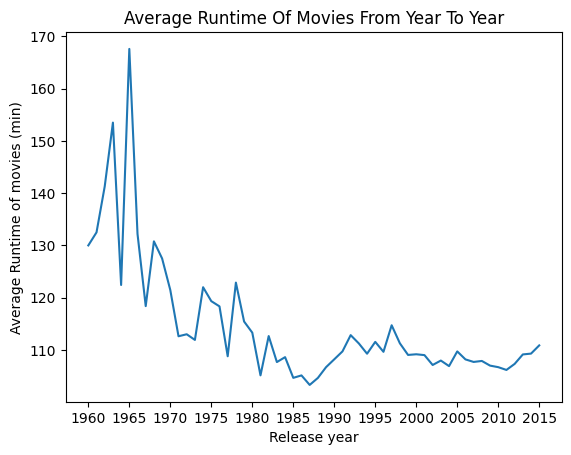

In [ ]:
df_clean.groupby('release_year').runtime.mean().plot(xticks = np.arange(1960,2016,5))

plt.title('Average Runtime Of Movies From Year To Year')
plt.xlabel('Release year')
plt.ylabel('Average Runtime of movies (min)')

sns.set_style("whitegrid")

By looking at a graph, we can see a downward trend in runtime of movies from year to year.This is due to the fact that these days people don't have much time to sit and watch long movies and they find long movies boring.

Question 6

Total budget of movies from year to year?

Text(0, 0.5, 'Total budget of movies (US Dollars)')

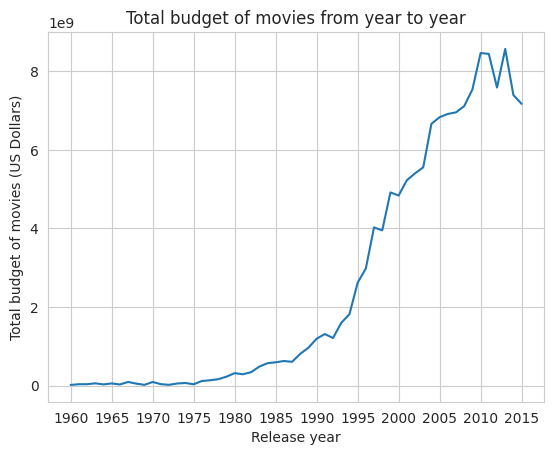

In [ ]:
sns.set_style("whitegrid")

df_clean.groupby('release_year').budget.sum().plot(xticks = np.arange(1960,2016,5))

plt.title('Total budget of movies from year to year')
plt.xlabel('Release year')
plt.ylabel('Total budget of movies (US Dollars)')

Question 7

Which months has maximum number of releases? What is the Number of movies released in each month?

Number of movies released in each month: 

release_month
September    459
December     415
October      363
June         340
August       337
July         314
November     303
May          291
March        279
April        266
February     257
January      225
Name: count, dtype: int64


Text(0, 0.5, 'Number of Movies')

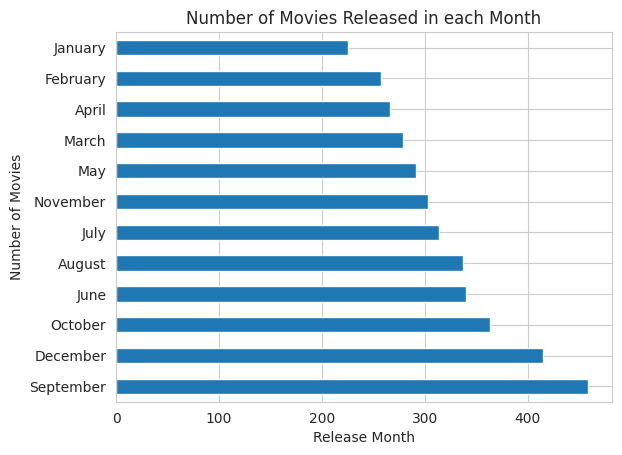

In [ ]:
#df_clean['month'] = df_clean['release_date'].dt.month
#above line give us month number.the below code give us month name
df_clean['release_month'] = df_clean['release_date'].dt.month_name()
print('Number of movies released in each month: \n')
print(df_clean['release_month'].value_counts())
df_clean['release_month'].value_counts().plot(kind='barh', title='Number of Movies Released in each Month')

plt.xlabel('Release Month')
plt.ylabel('Number of Movies')

Question 8

What is the total profit by month?

release_month
June         5.667111e+10
December     5.658429e+10
May          4.239264e+10
November     3.917966e+10
July         3.840163e+10
March        2.505131e+10
October      2.325971e+10
April        1.893061e+10
August       1.817372e+10
September    1.650584e+10
February     1.228176e+10
January      1.028501e+10
Name: profit, dtype: float64


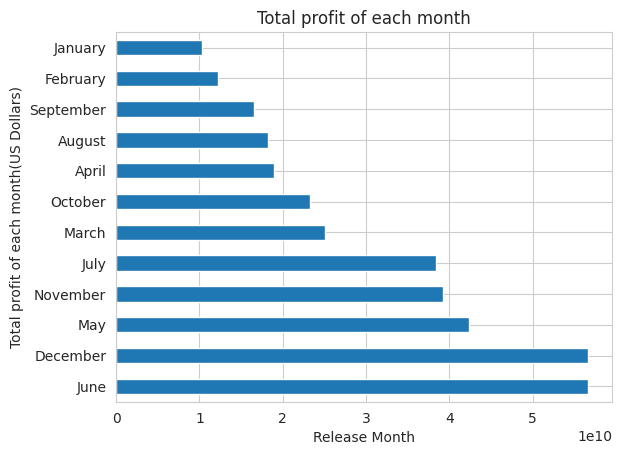

In [ ]:
sns.set_style("whitegrid")

df_clean.groupby('release_month').profit.sum().sort_values(ascending = False).plot(kind='barh')

plt.title('Total profit of each month')
plt.xlabel('Release Month')
plt.ylabel('Total profit of each month(US Dollars)')

print(df_clean.groupby('release_month').profit.sum().sort_values(ascending = False))

We can see that June(56.6 Billion dollars) and december(56.5 Billion dollars) are most profitable month to release a movie.This tell us that it is better to release movie in december which is the season of Thanksgiving, Christmas and New Year’s, the audience seeks good films in cinemas and for at-home entertainment.

Question 9

Which Genre Has The Highest Release Of Movies?

{'Action': 1085, 'Adventure': 749, 'Science Fiction': 519, 'Thriller': 1203, 'Fantasy': 396, 'Crime': 651, 'Western': 52, 'Drama': 1753, 'Family': 425, 'Animation': 201, 'Comedy': 1357, 'Mystery': 344, 'Romance': 666, 'War': 119, 'History': 129, 'Music': 134, 'Horror': 463, 'Documentary': 31, 'Foreign': 12, 'TV Movie': 1}


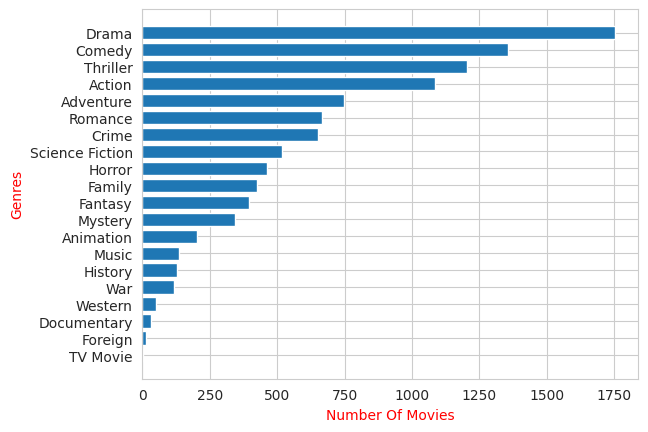

In [ ]:
df_clean['genres_splitted_list'] = df_clean['genres'].str.split("|")

genre_count_dict = {}

for genres in df_clean['genres_splitted_list']:
    for genre in genres:
        if genre in genre_count_dict.keys():
            genre_count_dict[genre] += 1
        else:
            genre_count_dict[genre] = 1

print(genre_count_dict)

keys = list(genre_count_dict.keys())
values = list(genre_count_dict.values())

genre_count_df = pd.DataFrame({'genres':keys,'counts':values})

plt.barh('genres', 'counts', data= genre_count_df.sort_values('counts'))

plt.xlabel('Number Of Movies',color='red')
plt.ylabel("Genres",color='red')

plt.show()

#we can use seaborn
#sns.barplot(y ='genres' , x= 'counts', data = df.sort_values('counts'), orient ='h')

Question 10

Which cast were more filmed? Most Frequent star cast?

                    cast  counts
220       Robert De Niro      52
571         Bruce Willis      46
73     Samuel L. Jackson      44
808         Nicolas Cage      43
34            Matt Damon      36
242          Johnny Depp      35
282   Sylvester Stallone      34
152            Tom Hanks      34
119            Brad Pitt      34
15         Harrison Ford      34
703       Morgan Freeman      34
121           Tom Cruise      33
730    Denzel Washington      32
1745        Eddie Murphy      32
78           Liam Neeson      31
416          Owen Wilson      30


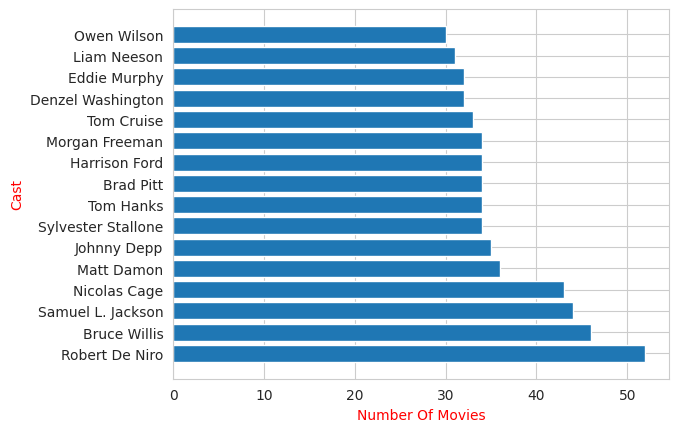

In [ ]:
df_clean['cast_splitted_list'] = df_clean['cast'].str.split("|")

cast_count_dict = {}

for cast in df_clean['cast_splitted_list']:
    for artist in cast:
        if artist in cast_count_dict.keys():
            cast_count_dict[artist] += 1
        else:
            cast_count_dict[artist] = 1

keys = list(cast_count_dict.keys())
values = list(cast_count_dict.values())

cast_count_df = pd.DataFrame({'cast':keys,'counts':values})

print(cast_count_df.sort_values('counts', ascending= False).iloc[0:16])

#sns.barplot(y ='cast' , x= 'counts', data = df.sort_values('counts', ascending= False).iloc[0:16], orient ='h')

plt.barh('cast', 'counts', data= cast_count_df.sort_values('counts', ascending= False).iloc[0:16])

plt.xlabel('Number Of Movies',color='red')
plt.ylabel("Cast",color='red')

plt.show()

According to the bar chart, The most filmed actor was Robert De Niro, Bruce Wills and Samual L. Jackson.Robert De Niro appeared in 52 movies in this dataset.

 Question 11

 Which director has made the most movies? Top 20 Director Who Directs Maximum Movies?

                  director  counts
32        Steven Spielberg      27
182         Clint Eastwood      24
7             Ridley Scott      21
120            Woody Allen      18
452        Martin Scorsese      17
366      Steven Soderbergh      17
238             Tim Burton      16
532           Oliver Stone      15
898         Brian De Palma      15
286           Renny Harlin      15
76         Robert Zemeckis      15
63              Ron Howard      14
583        Joel Schumacher      14
344             Tony Scott      14
319             Wes Craven      14
422   Francis Ford Coppola      13
1032        Richard Donner      13
514         John Carpenter      12
432       Robert Rodriguez      12
287             Rob Reiner      12


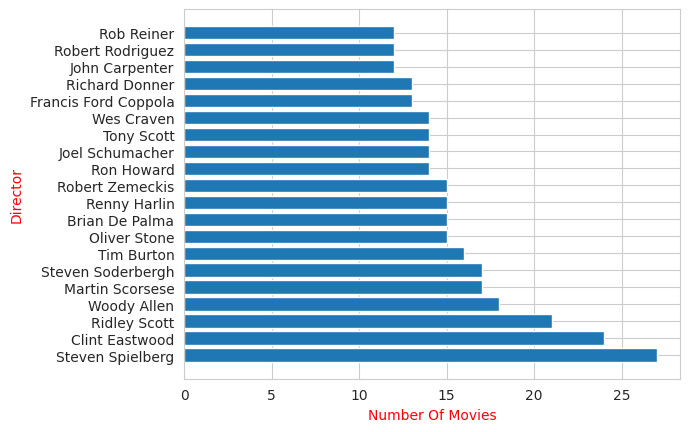

In [ ]:
director_count_dict = {}

for director in df_clean['director']:
        if director in director_count_dict.keys():
            director_count_dict[director] += 1
        else:
            director_count_dict[director] = 1

keys = list(director_count_dict.keys())
values = list(director_count_dict.values())

director_count_df = pd.DataFrame({'director':keys,'counts':values})

print(director_count_df.sort_values('counts', ascending= False).iloc[0:20])


plt.barh('director', 'counts', data= director_count_df.sort_values('counts', ascending= False).iloc[0:20])

plt.xlabel('Number Of Movies',color='red')
plt.ylabel("Director",color='red')

plt.show()

By looking at the chart we can conclude that Steven Spielberg made the most films with 27 movies.After Spielberg, Clint Eastwood and Ridley Scott directed the most movies with 24 and 21 respectively.

Question 12

What kinds of properties are associated with movies that have high revenues?

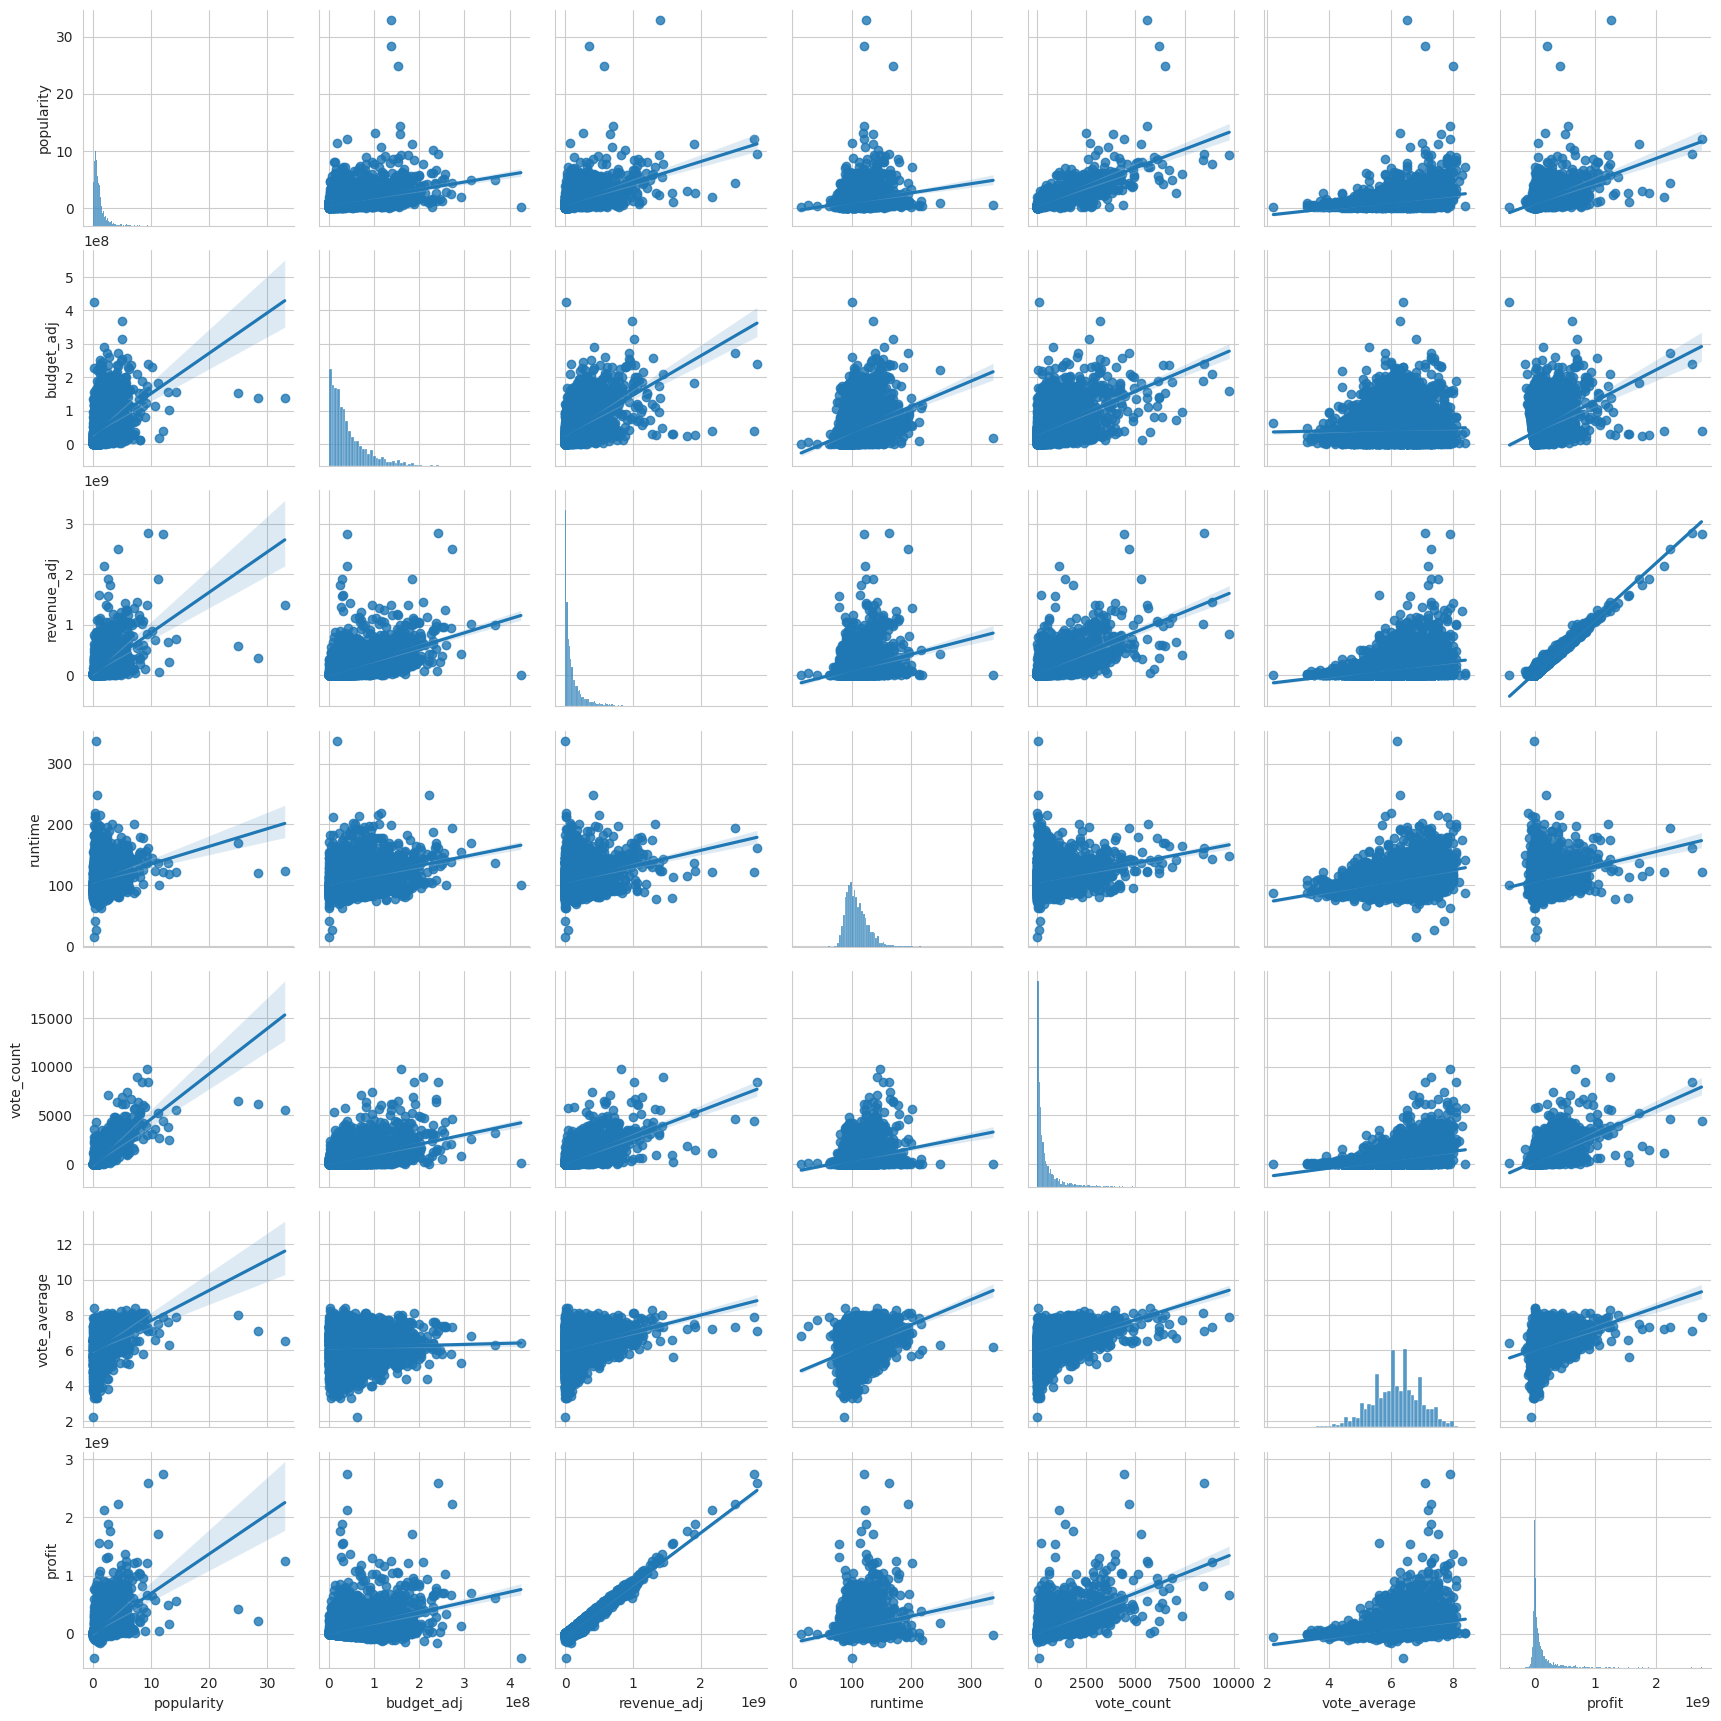

In [ ]:
sns.pairplot(df_clean[['popularity' , 'budget_adj', 'revenue_adj', 'runtime' , 'vote_count', 'vote_average', 'profit']], kind='reg')
# to show
plt.show()

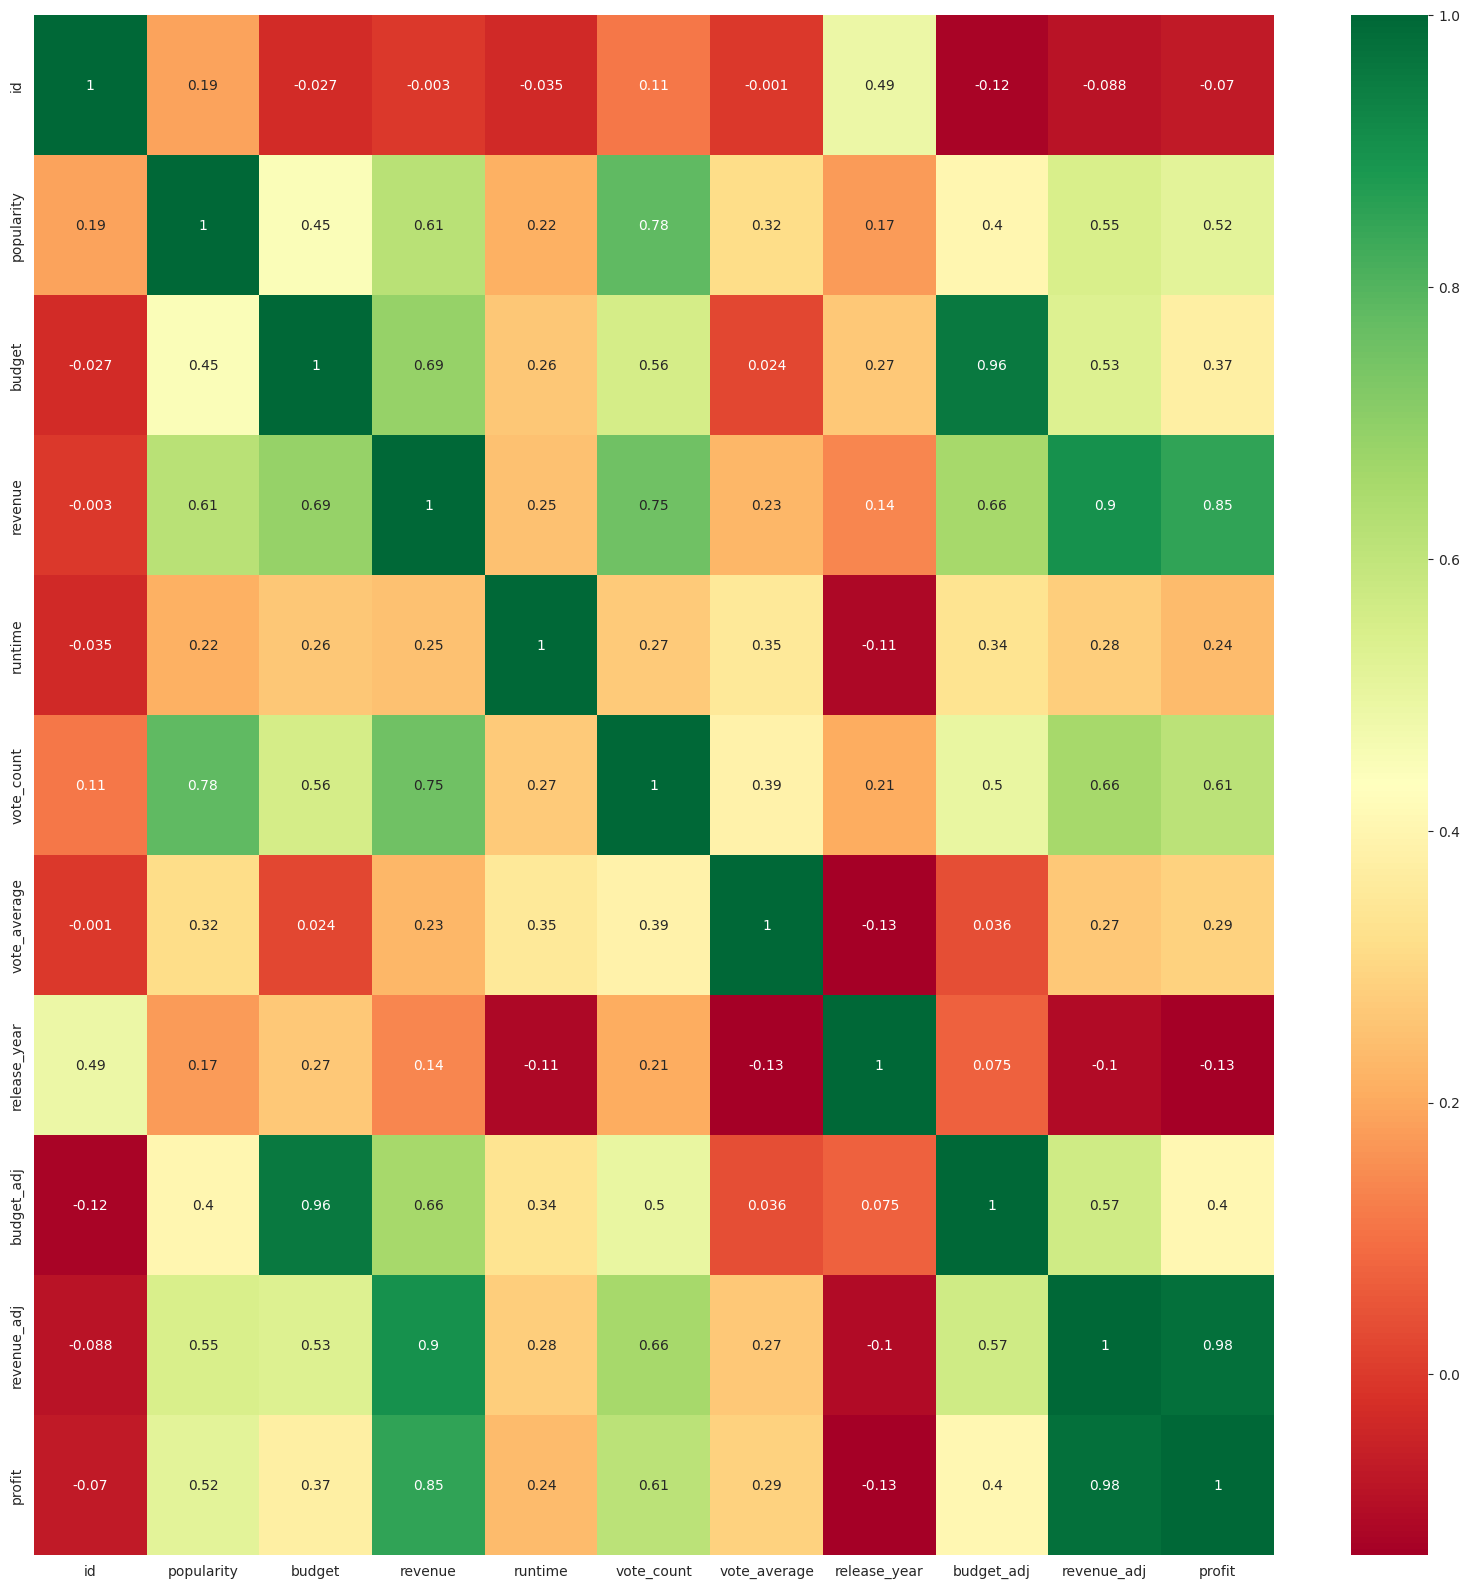

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr(numeric_only =True).round(3), annot=True, cmap='RdYlGn')
plt.show()

By taking a look at the correlation table and our pairplot, we can see that revenue and profit are highly correlated(0.851324).This is obvious that if movie's revenues incresaes, profits is increasing as well.The second most correlated movie property with revenue is vote_count with correlation coefficient of 0.754466.This tell us that if more number of people voted the movie, this means that more number of people watch it in the cinema and the revenue of movie will increase.The budget and popularity are also have high correlation with revenue : corr(revenue, budget)= 0.688403, corr(popularity, revenue)= 0.615348

Question 13

Is there a relation between the length of the movie title and its popularity ?

Text(0, 0.5, 'Popularity')

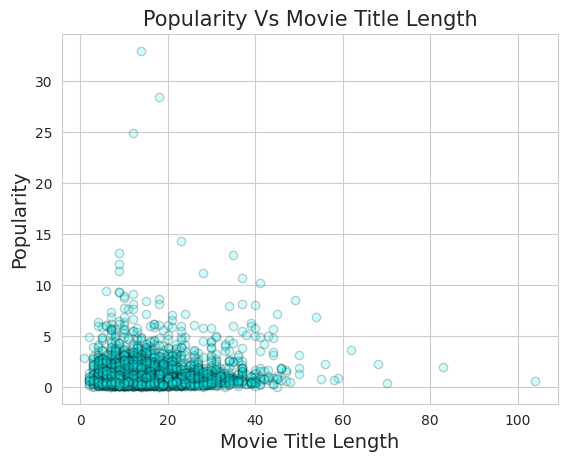

In [ ]:
#we define a new columns that stores a lenght of every movie title
df_clean['movie_title_length'] = df_clean['original_title'].str.len()

plt.scatter(x = df_clean.movie_title_length, y = df_clean.popularity , color='cyan', edgecolor='black', alpha=0.2)
plt.title('Popularity Vs Movie Title Length', fontsize=15)
plt.xlabel('Movie Title Length', fontsize=14)
plt.ylabel('Popularity',fontsize=14)

This scatter plot tell us that movies with shorter title length are often more popular.Movies with length more than 40 characters are not popular.This tell us that choosing movie title length with under 20 characters is better and will have a more chance to become popular.

### **Conclusions**

1. **Revenue**

   * *Highest Revenue:* Avatar (2009)
   * *Lowest Revenue:* Shattered Glass

2. **Budget**

   * *Highest Budget:* The Warrior's Way
   * *Lowest Budget:* Love, Wedding, Marriage

3. **Profit**

   * *Most Profitable:* Star Wars
   * *Least Profitable:* The Warrior's Way

4. **Runtime**

   * *Shortest Movie:* Kid's Story (2003)
   * *Longest Movie:* Carlos (2010)

5. **Trends**

   * Average runtime of movies has **decreased** from 1960 to 2015.
   * Total movie budgets have **increased** year over year.

6. **Release Month**

   * *Most Releases:* September (460 movies)
   * *Fewest Releases:* January (225 movies)
   * *Most Profitable Months:* June, December, May

7. **Genres**

   * Most released genres: Drama (1,756 movies), Comedy (1,358 movies), Thriller (1,204 movies)

8. **Cast & Directors**

   * Most frequent actors: Robert De Niro, Bruce Willis, Samuel L. Jackson
   * Most movies directed by: Steven Spielberg, Clint Eastwood, Ridley Scott

9. **Revenue Correlations**

   * Revenue is **highly correlated** with: Budget, Profit, Vote Count, Popularity
   * Higher budgets generally lead to higher revenues

10. **Title Length & Popularity**

    * Movies with **long titles** (> 60 characters) have lower popularity
    * Movies with **shorter titles** (< 20 characters) are more likely to be popular


